![Images](Images/ITAcademy.png)
# DATA SCIENCE: S05.T01
#### Created by: Dani Planas Montserrat


In [1]:
##########################################################################
##           DATA SCIENCE: S05.T01: Nivell 1 Exercici 1                 ##
##########################################################################
# Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi. 
# Realitza un mostreig de les dades generant una mostra aleatòria simple (1) i 
# una mostra sistemàtica (2).

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')




In [2]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [3]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [4]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [5]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [6]:
#************************************************************************************
#********************************         Main       ********************************
#************************************************************************************

# Dataset conatin records of running training during 2019 from 36,412 athletes from around the world
path_name = "Data sets\\SP05\\"                                        # Define Path name
file_name = "run_ww_2019_m.parquet"                                    # Define File name
dfRunners19 = openFileParquet(path_name, file_name)                      # Function to open Files type *.parquet
display(dfRunners19)                                                     # Display dataframe


# Dataset conatin records of running training during 2020 from 36,412 athletes from around the world
path_name = "Data sets\\SP05\\"                                        # Define Path name
file_name = "run_ww_2020_m.parquet"                                    # Define File name
dfRunners20 = openFileParquet(path_name, file_name)                      # Function to open Files type *.parquet
display(dfRunners20)                                                     # Display dataframe





,datetime,athlete,distance,duration,gender,age_group,country,major
0,2019-01-31,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2019-01-31,1,194.990323,1132.951613,M,35 - 54,Germany,BERLIN 2016
2,2019-01-31,2,127.653871,833.290323,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2019-01-31,3,390.212903,1772.225806,M,18 - 34,United Kingdom,LONDON 2017
4,2019-01-31,4,100.509677,543.467742,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2019-12-31,37594,146.349677,695.112903,M,18 - 34,United Kingdom,BERLIN 2017
436940,2019-12-31,37595,587.602258,2437.435484,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2019-12-31,37596,161.051613,680.467742,M,18 - 34,United States,BOSTON 2017
436942,2019-12-31,37597,136.219355,697.370968,F,18 - 34,United States,BOSTON 2015


,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-31,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
2,2020-01-31,2,106.267742,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-31,3,203.758065,935.532258,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-31,4,94.558065,500.838710,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2020-12-31,37594,464.621613,2087.500000,M,18 - 34,United Kingdom,BERLIN 2017
436940,2020-12-31,37595,338.187097,1385.129032,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2020-12-31,37596,544.345161,2318.338710,M,18 - 34,United States,BOSTON 2017
436942,2020-12-31,37597,195.900000,1121.322581,F,18 - 34,United States,BOSTON 2015


<span style=color:green><b>IMPORTACIÓ DE DADES / DESCRIPCIÓ DATASET</u></b></span> 

En el Punt anterior hem exportat les dades d'una dataset. El dataset l'hem trobat a través del buscador de google "https://datasetsearch.research.google.com. ". A través del buscador hem anat a la pàgina web "figshare.com" i hem descarregat el dataset.

Aquest dataset que hem seleccionat és un conjunt de registres d'entrenaments d'atletes arreu de tot el mon durant l'any 2020. El dataset registre el quilòmetres acumulats al mes.

Les dades amb les activitats dels atletes estan contingudes en objectes de marc de dades (dades tabulars) i es guarden en el format de fitxer Parquet. Per poder obrir aquests fitxers hem descarregat  i instal·lat la llibreria "pyarrow".

Les dades que hem exportat :

- datetime: data de l'activitat en curs;
- atleta: un identificador generat per ordinador per a l'esportista ;
- distància: distància de carrera (en quilòmetres);
- durada: durada de la carrera (en minuts);
- gènere: gènere ('M':Masculí ; 'F':Femení);
- age_group: interval d'edat ( '18 - 34', '35 - 54' o '55 +');
- país: país d'origen de l'esportista (corda);
- major: marató(s) i any(s) en què va córrer l'atleta;


In [7]:
# (1) Realitza un mostreig de les dades generant una mostra aleatòria simple

# SYTEMATIC SAMPLING: 
# select a subset in which each member of the subset has an equal probability of being choosen.

sample_df = dfRunners20.sample(100)          # Select 100 sample points from dataset
display(sample_df)                           # Print Result



,datetime,athlete,distance,duration,gender,age_group,country,major
424737,2020-12-31,24928,8.409677,52.741935,M,18 - 34,Japan,TOKYO 2019
244344,2020-07-31,26636,99.405484,667.016129,M,18 - 34,Thailand,TOKYO 2019
140820,2020-04-30,32551,184.980000,1139.666667,M,35 - 54,Japan,TOKYO 2018
425280,2020-12-31,25481,0.000000,0.000000,F,18 - 34,United Kingdom,NEW YORK 2019
320750,2020-09-30,30303,190.230000,980.833333,M,18 - 34,Thailand,TOKYO 2017
...,...,...,...,...,...,...,...,...
96821,2020-03-31,24718,31.035484,168.129032,M,55 +,United States,NEW YORK 2019
302284,2020-09-30,11376,81.298000,416.383333,M,35 - 54,United Kingdom,LONDON 2018
12290,2020-01-31,12723,179.979677,795.854839,M,18 - 34,United States,BOSTON 2019
353789,2020-10-31,26848,94.180645,394.112903,M,18 - 34,United States,BOSTON 2019


In [8]:
# (2) Realitza un mostreig de les dades generant una mostra sistemàtica

# SIMPLE RANDOM SAMPLING: 
# select a subset in which each member of the subset has an equal probability of being choosen.

sample_df = systematicSampling(dfRunners20, 1, 1000)          # Call function where Select 100 sample points from dataset
display(sample_df)                                            # Print Result

,datetime,athlete,distance,duration,gender,age_group,country,major
1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
1001,2020-01-31,1050,82.780645,449.709677,M,35 - 54,France,NEW YORK 2019
2001,2020-01-31,2101,0.000000,0.000000,M,35 - 54,Malaysia,TOKYO 2013
3001,2020-01-31,3126,105.725806,743.596774,F,35 - 54,United States,BOSTON 2018
4001,2020-01-31,4159,19.509677,126.774194,F,35 - 54,Singapore,"BOSTON 2016,TOKYO 2017"
...,...,...,...,...,...,...,...,...
432001,2020-12-31,32431,37.819355,284.532258,F,35 - 54,United Kingdom,LONDON 2017
433001,2020-12-31,33480,234.203226,1104.677419,M,35 - 54,United Kingdom,"BOSTON 2019,CHICAGO 2017"
434001,2020-12-31,34525,414.096774,2696.677419,M,35 - 54,Australia,"NEW YORK 2018,TOKYO 2017"
435001,2020-12-31,35560,0.000000,0.000000,F,18 - 34,United States,NEW YORK 2019


In [9]:
##########################################################################
##           DATA SCIENCE: S05.T01: Nivell 2 Exercici 2                 ##
##########################################################################
# Exercici 2: Continua amb el conjunt de dades de tema esportiu i genera 
# una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority
# Oversampling Technique).


# (1) Realitza un mostreig de les dades generant una mostra estratificada

# STRATIFIED SAMPLING: 
# Stratified Sampling is a sampling technique used to obtain samples that 
# best represent the population. It reduces bias in selecting samples by 
# dividing the population into homogeneous subgroups called strata, and randomly
# sampling data from each stratum(singular form of strata). 

# STEP1: Check the percentage of gender: 'M' or 'F' // of age Group: '18-34' or '35-54'  or '55+'
result1 = (dfRunners20['gender'].value_counts()) / len(dfRunners20) * 100
result2 = (dfRunners20['age_group'].value_counts()) / len(dfRunners20) * 100




display(result1)
display(result2)
print(len(dfRunners20))

M    75.587718
F    24.412282
Name: gender, dtype: float64

35 - 54    59.323849
18 - 34    33.620784
55 +        7.055366
Name: age_group, dtype: float64

436944


<span style=color:green><b>MOSTRA ESTRATIFICADA</u></b></span> 

En el Punt anterior hem fet un anàlisis de dos grups, el de gènere i el de grups d'edat. De cada un d'ells hem calculat el percentatge que hi ha a cada subgrup.

Finalment decidim fer una mostra estratificada a partir del grup d'edat, que com  podem veure els percentatges són de 34% pel grup de '18-34', de 59% pel grup de '35 -54' i un 7% pel grup de '55+'.

Després amb la funció que hem i que cridem en el següent punt, tenim com a paràmetre d'entrada un '0.001' que significa que agafarem un 0.1% per a cada un dels grups de forma proporcional, és a dir, agafarem un 0.1% del total de cada un dels grups. Així tindrem una mostra més representativa de cada un dels grups.

In [10]:

# Call Function for doing a Stratified Sampling from dataset (able for 3 subgroups) and select a 0,1%
df = stratifiedSampling3Group(dfRunners20, 'age_group', '18 - 34', '35 - 54', '55 +', 0.001)
display (df)

,datetime,athlete,distance,duration,gender,age_group,country,major
335117,2020-10-31,7683,210.270968,987.419355,F,18 - 34,United States,NEW YORK 2019
338684,2020-10-31,11364,74.196774,363.193548,M,18 - 34,Denmark,BERLIN 2019
14202,2020-01-31,14680,0.000000,0.000000,F,18 - 34,Canada,TOKYO 2019
228450,2020-07-31,10333,71.458065,336.129032,M,18 - 34,United States,"BOSTON 2013,BOSTON 2019"
191107,2020-06-30,9372,49.560000,274.600000,M,18 - 34,United Kingdom,LONDON 2018
...,...,...,...,...,...,...,...,...
391777,2020-11-30,28460,75.340000,582.100000,M,55 +,Italy,BOSTON 2019
427536,2020-12-31,27794,0.000000,0.000000,M,55 +,United States,CHICAGO 2019
232298,2020-07-31,14292,210.290323,1278.483871,F,55 +,United States,BOSTON 2017
138072,2020-04-30,29667,30.220000,198.283333,F,55 +,United States,NEW YORK 2019


<span style=color:green><b>SMOTE (Synthetic Minority Oversampling Technique)</u></b></span> 

En moltes ocasions quan tenim un conjunt de dades, normalment hi ha una clase que predomina sobre les altres o es pot donar el cas que una classe tingui molt pocs elements. Això fa que si agafem un mostreig aleatori tendeixi a representar la classe que té major presència.

Per evitar aixì existeix la técnica SMOTE (Synthethic Minority Over-Sampling) basada en generar de forma sintètica nous elements de la classe minoritària utilitzant com a referència els elements ja presents. D'aquesta forma es selecciona un conjunt de classe i es generen nous elements.

In [11]:
dfRunners20.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436944 entries, 0 to 436943
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   436944 non-null  datetime64[ns]
 1   athlete    436944 non-null  int64         
 2   distance   436944 non-null  float64       
 3   duration   436944 non-null  float64       
 4   gender     436944 non-null  object        
 5   age_group  436944 non-null  object        
 6   country    432996 non-null  object        
 7   major      436944 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.7+ MB


In [12]:
dfRunners20.isnull().sum()

datetime        0
athlete         0
distance        0
duration        0
gender          0
age_group       0
country      3948
major           0
dtype: int64

In [13]:
dfRunners20['gender'].value_counts()

M    330276
F    106668
Name: gender, dtype: int64

In [14]:
dfRunners20.shape

(436944, 8)

In [15]:
#dfRunners20=dfRunners20.drop('duration',axis=1)
#dfRunners20['gender'].replace(to_replace=True, value=1, inplace=True)
#dfRunners20['gender'].replace(to_replace=False,  value=0, inplace=True)
#df_dummies=pd.get_dummies(data)
#dfRunners20.head()

In [15]:
#Convert the column 'GENDER' in values '0' and '1'
df = dfRunners20
df['gender'] = [0 if x == 'F' else 1 for x in df['gender']]
display(df)

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-31,0,0.000000,0.000000,0,18 - 34,United States,CHICAGO 2019
1,2020-01-31,1,237.900000,1398.677419,1,35 - 54,Germany,BERLIN 2016
2,2020-01-31,2,106.267742,739.354839,1,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-31,3,203.758065,935.532258,1,18 - 34,United Kingdom,LONDON 2017
4,2020-01-31,4,94.558065,500.838710,1,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2020-12-31,37594,464.621613,2087.500000,1,18 - 34,United Kingdom,BERLIN 2017
436940,2020-12-31,37595,338.187097,1385.129032,1,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2020-12-31,37596,544.345161,2318.338710,1,18 - 34,United States,BOSTON 2017
436942,2020-12-31,37597,195.900000,1121.322581,0,18 - 34,United States,BOSTON 2015


<AxesSubplot:xlabel='distance', ylabel='duration'>

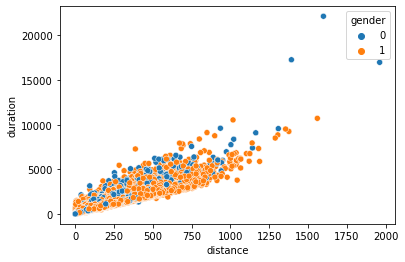

In [17]:
import pandas as pd
import seaborn as sns
#Show a plot with values gender, distance and duration
df = df[['distance', 'duration', 'gender']]
sns.scatterplot(data = df, x ='distance', y = 'duration', hue = 'gender')

In [18]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#Oversampling the data with SMOTE
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['distance', 'duration', 'gender']], df['gender'])
counter = Counter(y)
print(counter)
print(X)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['distance', 'duration', 'gender'])

#Show the dataframe oversampled
display(df_oversampler)

#Show the difference between dataset before to oversampling and after
print('Dataset Original:', dfRunners20['gender'].value_counts())
print('Dataset SOMTE:',df_oversampler['gender'].value_counts())

Counter({0: 330276, 1: 330276})
          distance     duration  gender
0         0.000000     0.000000       0
1       237.900000  1398.677419       1
2       106.267742   739.354839       1
3       203.758065   935.532258       1
4        94.558065   500.838710       1
...            ...          ...     ...
660547  246.817555  1407.586157       0
660548   58.404057   328.028046       0
660549   13.560817    77.485829       0
660550  124.103520   720.177458       0
660551  151.331063   839.788017       0

[660552 rows x 3 columns]


,distance,duration,gender
0,0.000000,0.000000,0
1,237.900000,1398.677419,1
2,106.267742,739.354839,1
3,203.758065,935.532258,1
4,94.558065,500.838710,1
...,...,...,...
660547,246.817555,1407.586157,0
660548,58.404057,328.028046,0
660549,13.560817,77.485829,0
660550,124.103520,720.177458,0


Dataset Original: 1    330276
0    106668
Name: gender, dtype: int64
Dataset SOMTE: 0    330276
1    330276
Name: gender, dtype: int64


<AxesSubplot:xlabel='distance', ylabel='duration'>

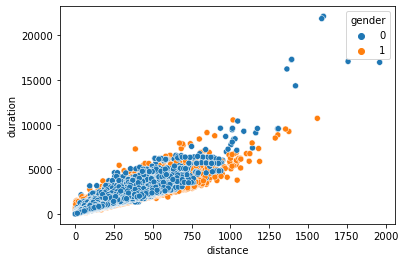

In [19]:
# Show a plot with new values after oversample
sns.scatterplot(data = df_oversampler, x ='distance', y = 'duration', hue = 'gender')

In [20]:
##########################################################################
##           DATA SCIENCE: S05.T01: Nivell 3 Exercici 3                 ##
##########################################################################
# Exercici 2: Continua amb el conjunt de dades de tema esportiu i genera 
# una mostra utilitzant el mètode Reservoir sampling.

# Call Function for doing a Reservoir Sampling from dataset
df = reservoirSampling(dfRunners20, 20)
display(df)


[306767, 227569, 181972, 132167, 282883, 228072, 325120, 31139, 244184, 127597, 151030, 396724, 77892, 273247, 21630, 82033, 345349, 286912, 225309, 361714]
20


,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-09-30,15977.0,0.000000,0.000000,1.0,35 - 54,Kenya,BERLIN 2019
1,2020-07-31,9423.0,38.806452,171.177419,1.0,35 - 54,United States,"BOSTON 2013,BOSTON 2014"
2,2020-05-31,37508.0,147.309677,724.967742,1.0,18 - 34,Brazil,BOSTON 2019
3,2020-04-30,23623.0,135.360000,676.500000,0.0,35 - 54,United Kingdom,LONDON 2016
4,2020-08-31,28807.0,0.000000,0.000000,0.0,35 - 54,Germany,BERLIN 2019
5,2020-07-31,9942.0,51.609677,278.548387,1.0,35 - 54,United States,BOSTON 2018
6,2020-09-30,34890.0,0.000000,0.000000,1.0,55 +,United Kingdom,LONDON 2019
7,2020-01-31,32081.0,245.206452,1102.225806,1.0,35 - 54,United States,"BOSTON 2016,BOSTON 2019"
8,2020-07-31,26469.0,129.231290,686.193548,1.0,18 - 34,Germany,BERLIN 2019
9,2020-04-30,18949.0,525.220000,2396.750000,1.0,18 - 34,Finland,BERLIN 2018


<span style=color:green><b>RESERVOIR SAMPLING</u></b></span> 

Hem creat una funció amb un algoritme que ens permet seleccionar un número "k" de mostres d'una secuencia de forma que cada una tingui la mateixa probabilitat de ser selecionada.